##### **Brief History**

Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

### Importing our libraries

In [144]:
#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#this is to ignore warning messages that often display
import warnings
warnings.filterwarnings('ignore')

### Reading in the dataset

In [145]:
data = pd.read_csv(r"C:\Users\HP\Desktop\Aspilos\Data Science\dataset\titanic_train.csv")

### Getting a feel of our dataset

In [146]:
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [147]:
data.tail()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.700,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.775,NaN,S,NaN,NaN,NaN,0
849,425,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.000,NaN,S,NaN,19.0,"Bronx, NY",0


In [148]:
data.shape

(850, 15)

In [149]:
data.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


We have 850 rows and 15 features:3 features are float, 5 are interger, 7 are objects. Some of the feature/columns also have null or missing values

In [151]:
data.corr()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
passenger_id,1.000000,0.896525,-0.340788,0.098996,-0.000191,-0.480013,-0.027040,-0.305726
pclass,0.896525,1.000000,-0.406071,0.074418,-0.006388,-0.560884,-0.089349,-0.329360
age,-0.340788,-0.406071,1.000000,-0.251310,-0.159216,0.194609,0.168140,-0.042683
sibsp,0.098996,0.074418,-0.251310,1.000000,0.389236,0.141797,-0.121234,-0.044980
parch,-0.000191,-0.006388,-0.159216,0.389236,1.000000,0.246414,0.131441,0.059172
fare,-0.480013,-0.560884,0.194609,0.141797,0.246414,1.000000,-0.084357,0.251249
body,-0.027040,-0.089349,0.168140,-0.121234,0.131441,-0.084357,1.000000,NaN
survived,-0.305726,-0.329360,-0.042683,-0.044980,0.059172,0.251249,NaN,1.000000


In [152]:
data.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


data.describe() provide statistics for the numeric features

In [153]:
data.describe(include=["object"])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,850,850,850,191,849,308,464
unique,849,2,660,135,3,26,272
top,"Kelly, Mr. James",male,CA. 2343,G6,S,4,"New York, NY"
freq,2,551,10,4,589,25,36


Lets describe whats the meaning of the features given the both train & test datasets.
<h4>Variable Definition Key.</h4>
- Survival
 - 0= No
 - 1= Yes
- pclass (Ticket class)
 - 1=1st
 - 2=2nd
 - 3=3rd
 
- sex
<br>

- age


- sibsp (# of siblings / spouses aboard the Titanic)
<br>
- parch (# of parents / children aboard the Titanic)
<br>
- tickets
<br>
- fare
<br>
- cabin
- boat: Lifeboat(if survived)
- body: Body number(if did not survive and body was recovered)
- embarked Port of Embark.
 - C = Cherbourg,
 - Q = Queenstown,
 - S = Southampton
- pclass: A proxy for socio-economic status (SES)
<br>
<h4>This is important to remember and will come in handy for later analysis.</h4>
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower



## Data cleaning

It looks like this dataset is quite organized, however, before using this dataset for analyzing and visualizing we need to deal with null values, duplicate values, outliers...



#### Treating missing values

In [154]:
#Getting sum of null values for each feature
data.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

We see Age,Cabin,boat,body,home.dest having a lot of missing values.So First we need to deal with all these NaN values.
As in Cabin,boat,and body columns more 2\3rd of the values are missing.So we get rid of these columns. 

#### Why missing values treatment is required?
Missing data in the data set can lead to a bias because we have not analysed the behavior and relationship with other variables correctly

In [155]:
#we can create a new variable or continue using our variable name data
data = data.drop(['cabin','boat','body'], axis=1)

In [156]:
data.shape

(850, 12)

Now the columns have been reduced from 15 to 12

For our age feature, we can fill the missing values with the mean, median,or mode of the ages. There are other techniques but we'll use the median for now

In [157]:
data['age'].median()

28.0

<AxesSubplot:>

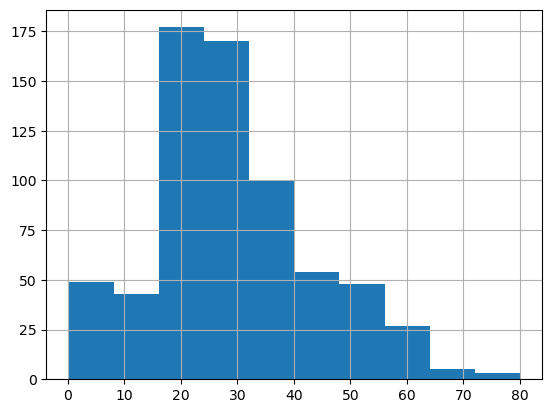

In [158]:
data["age"].hist()

In [159]:
data['age'] = data['age'].fillna(data['age'].median())

In [160]:
data['age'].isna().sum()

0

Now age has no missing values

We can fill home.dest with the mode

In [161]:
data['home.dest'].mode()

0    New York, NY
Name: home.dest, dtype: object

In [162]:
data['home.dest'].value_counts()

New York, NY                            36
London                                   7
Cornwall / Akron, OH                     7
Sweden Winnipeg, MN                      6
Wiltshire, England Niagara Falls, NY     6
                                        ..
Toronto, ON                              1
Hartford, CT                             1
Bournemouth, England                     1
?Havana, Cuba                            1
Bronx, NY                                1
Name: home.dest, Length: 272, dtype: int64

In [163]:
# because home.dest is object(text), we'll copy the value for the mode and paste to fill
data['home.dest'] = data['home.dest'].fillna('New York, NY')

In [164]:
data['home.dest'].isnull().sum()

0

Now home.dest has no null values

<AxesSubplot:>

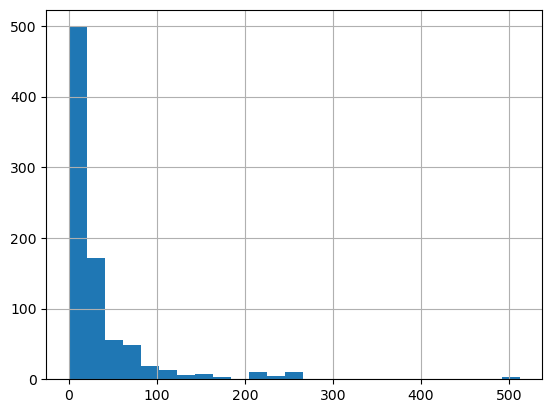

In [165]:
data['fare'].hist(bins=25)

In [166]:
data['fare'].value_counts()

13.0000    42
8.0500     40
7.7500     39
7.8958     32
26.0000    29
           ..
28.7125     1
9.2167      1
8.5167      1
9.3250      1
6.4958      1
Name: fare, Length: 236, dtype: int64

In [167]:
data['fare'].median()

14.1083

In [168]:
#For fare, let's use median
data['fare']=data['fare'].fillna(data['fare'].median())

data['fare'].isnull().sum()

0

In [169]:
#For embarked, let's use mode
data['embarked'].value_counts()

S    589
C    176
Q     84
Name: embarked, dtype: int64

In [170]:
data['embarked'].mode()

0    S
Name: embarked, dtype: object

In [171]:
data['embarked']=data['embarked'].fillna('S')
data['embarked'].isnull().sum()

0

In [172]:
data.isna().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
home.dest       0
survived        0
dtype: int64

### Checking for duplicate values

In [173]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
845    False
846    False
847    False
848    False
849    False
Length: 850, dtype: bool

This return either True or False for if a row is duplicated(is same with another row)

Then we can check for those that are True, that is are duplicated

In [174]:
data[data.duplicated()==True]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,survived


Luckily we have no rows that are duplicated, else

data.drop_duplicates will remove the duplicates. We can still try it to see

In [175]:
data.drop_duplicates()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,28.0,0,0,335432,7.7333,Q,"New York, NY",1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,"New York, NY",0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,S,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,C,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,S,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S,"New York, NY",0


It's still our 850 rows meaning that there is no duplicates and no row was dropped

### Treating Outlier(extreme values)

Outliers are extreme values, if you have age to be 200 or -5, they're likely outliers as people dont live up to 200 in the world today, and age cannot be negative

data.describe() is giving us a sense of outliers already. For instance,the 75th percentile of fare is 31 while the maximum value is 512. We might go ahead to drop the rows with outlier values or use visualizations to further confirm this

In [176]:
data.describe()

,passenger_id,pclass,age,sibsp,parch,fare,survived
count,850.000000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,662.816471,2.32000,29.208726,0.522353,0.382353,33.989284,0.368235
std,380.751936,0.83853,12.999023,1.112132,0.879511,53.678483,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,332.250000,2.00000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,0.000000
75%,992.250000,3.00000,34.875000,1.000000,0.000000,30.923950,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,1.000000


## Exploratory Data Analysis

We talk about this next....

In [177]:
#value count for pclass
data['pclass'].value_counts()

3    478
1    206
2    166
Name: pclass, dtype: int64

Most of the passengers are in pclass 3

Let's see the count of pclass by sex, we use groupby here

In [178]:
data.groupby(['pclass','sex'])['pclass'].count().to_frame()

pclass
pclass sex           
1      female      94
       male       112
2      female      67
       male        99
3      female     138
       male       340

Getting some insights 

In [179]:
len(data[data.sex == 'female'])

299

In [180]:
len(data[data.sex=='female']), len(data)

(299, 850)

In [181]:
#what percentage of the passengers are female?
fe=(len(data[data.sex=='female'])/len(data)) * 100

print('The percentage of female is {}'.format(fe))
#see how print formatting was used there

The percentage of female is 35.17647058823529


In [182]:
#what percentage of the passengers are male?
men=(len(data[data.sex=='male'])/len(data)) * 100

print('The percentage of male is {}'.format(men))
#see how print formatting was used there

The percentage of male is 64.8235294117647


In [183]:
#What percentage of the passengers are below 10 years of age?
ag=(len(data[data.age<10])/len(data)) * 100
print('{} percentage of the passengers are below 10 years of age'.format(ag))

6.588235294117648 percentage of the passengers are below 10 years of age


In [184]:
#What percentage of the passengers are 70 plus years of age?
elderly=(len(data[data.age>= 70])/len(data)) * 100
print('{} percentage of the passengers are 70 plus years of age'.format(elderly))

0.5882352941176471 percentage of the passengers are 70 plus years of age


In [185]:
#What percentage of the passengers are either below 10 or above 70 years ?
agt=(len(data[(data.age<10) | (data.age>70)] )/len(data)) * 100
print('{} percentage of the passengers are either below 10 or above 70 years'.format(agt))

6.9411764705882355 percentage of the passengers are either below 10 or above 70 years


In [186]:
#What percentage of passengers below 5 years are males
be = (len(data[(data.age<5) & (data.sex=='male')] )/len(data)) * 100

print('{:.2f} percentage of the passengers below 5 years are males'.format(be))
#formatting to 2 decimal place is nicer, still remember how to do it?

2.24 percentage of the passengers below 5 years are males


### Visualizations

**Univariate analysis(visualizing one variable/feature)**

You may use histogram,barplot,pieplot,boxplot.etc as the case may be, and you can customized your visuals as much as you can

Text(0, 0.5, 'Count per Age Group')

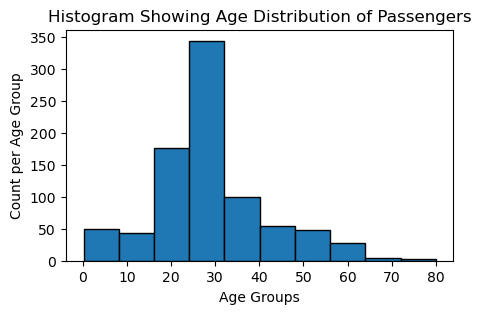

In [187]:
plt.figure(figsize=(5, 3))
plt.hist(x='age',data=data,edgecolor='black')
plt.title('Histogram Showing Age Distribution of Passengers')
plt.xlabel('Age Groups')
plt.ylabel('Count per Age Group')

In [188]:
data["sex"].value_counts()

male      551
female    299
Name: sex, dtype: int64

<AxesSubplot:title={'right':'Pie plot showing the sex of passengers'}, ylabel='sex'>

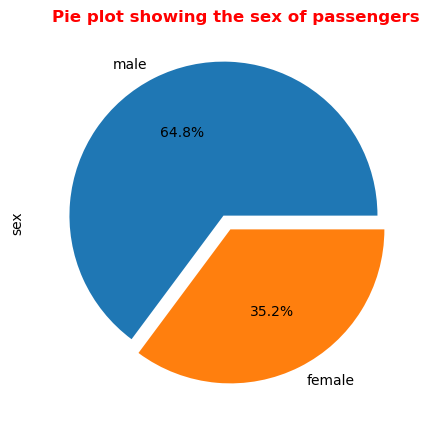

In [189]:
#size of figure
plt.figure(figsize=(5,5))

#Customizing the title
plt.title('Pie plot showing the sex of passengers',fontdict={'fontsize':12,'fontweight':'bold','color':'red'},loc='right')

#Firts getting the value count,then plotting a pie chart.
#explode gives the separation while autopct calculates respective percentage automatically
data['sex'].value_counts().plot(kind='pie',explode=[0.05,0.05],autopct='%2.1f%%')

<AxesSubplot:xlabel='fare'>

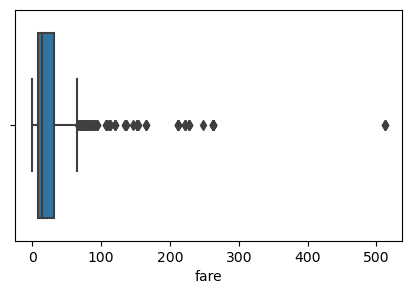

In [190]:
#boxplot shows likely outliers with the dot
plt.figure(figsize=(5, 3))

sns.boxplot(x='fare',data=data)

In [191]:
data["fare"].value_counts().head(15)

13.0000    42
8.0500     40
7.7500     39
7.8958     32
26.0000    29
7.2292     20
7.7750     19
10.5000    19
7.8542     15
26.5500    15
8.6625     14
7.2250     14
7.9250     14
7.2500     12
0.0000     11
Name: fare, dtype: int64

<AxesSubplot:xlabel='age'>

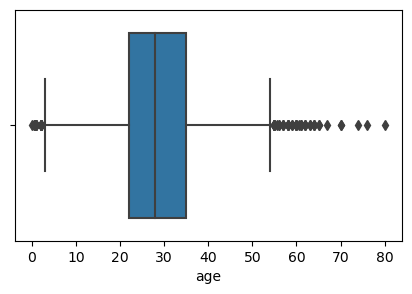

In [192]:
plt.figure(figsize=(5,3))
sns.boxplot(x='age',data=data)

In [193]:
data["age"].dtype

dtype('float64')

<AxesSubplot:title={'center':'Countplot showing survival for sex '}, xlabel='sex', ylabel='count'>

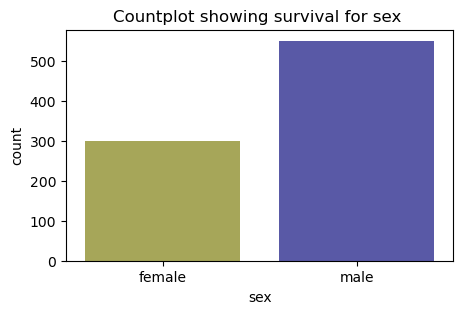

In [194]:
plt.figure(figsize=(5,3))
plt.title('Countplot showing survival for sex ')
sns.countplot(x='sex',data=data, palette=['yellow','blue'],saturation=0.3)

<AxesSubplot:title={'center':'Countplot showing survival for sex '}, xlabel='sex', ylabel='count'>

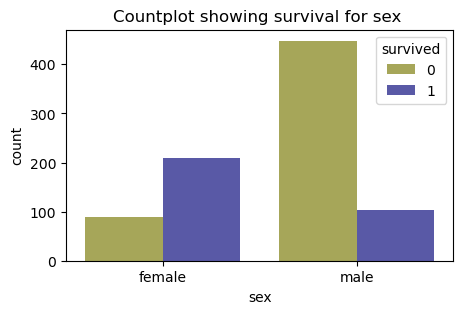

In [195]:
plt.figure(figsize=(5,3))
plt.title('Countplot showing survival for sex ')
sns.countplot(x='sex', hue='survived', data=data, palette=['yellow','blue'],saturation=0.3)

<AxesSubplot:title={'center':'Countplot showing survival for sex '}, xlabel='embarked', ylabel='count'>

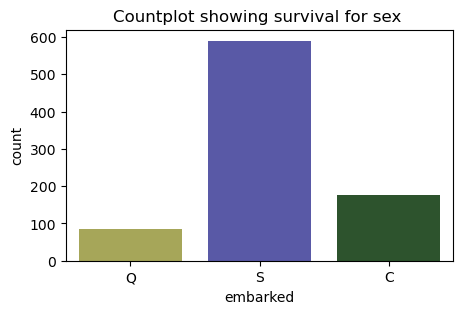

In [196]:
plt.figure(figsize=(5,3))
plt.title('Countplot showing survival for sex ')
sns.countplot(x='embarked', data=data, palette=['yellow','blue', 'green'],saturation=0.3)

<AxesSubplot:title={'center':'Countplot showing survival for sex '}, xlabel='embarked', ylabel='count'>

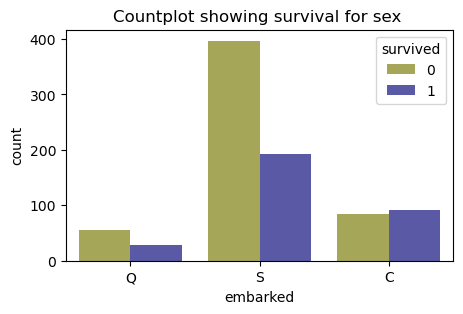

In [197]:
plt.figure(figsize=(5,3))
plt.title('Countplot showing survival for sex ')
sns.countplot(x='embarked',hue='survived', data=data, palette=['yellow','blue', 'green'],saturation=0.3)

<AxesSubplot:title={'center':'Countplot for parch '}, xlabel='parch', ylabel='count'>

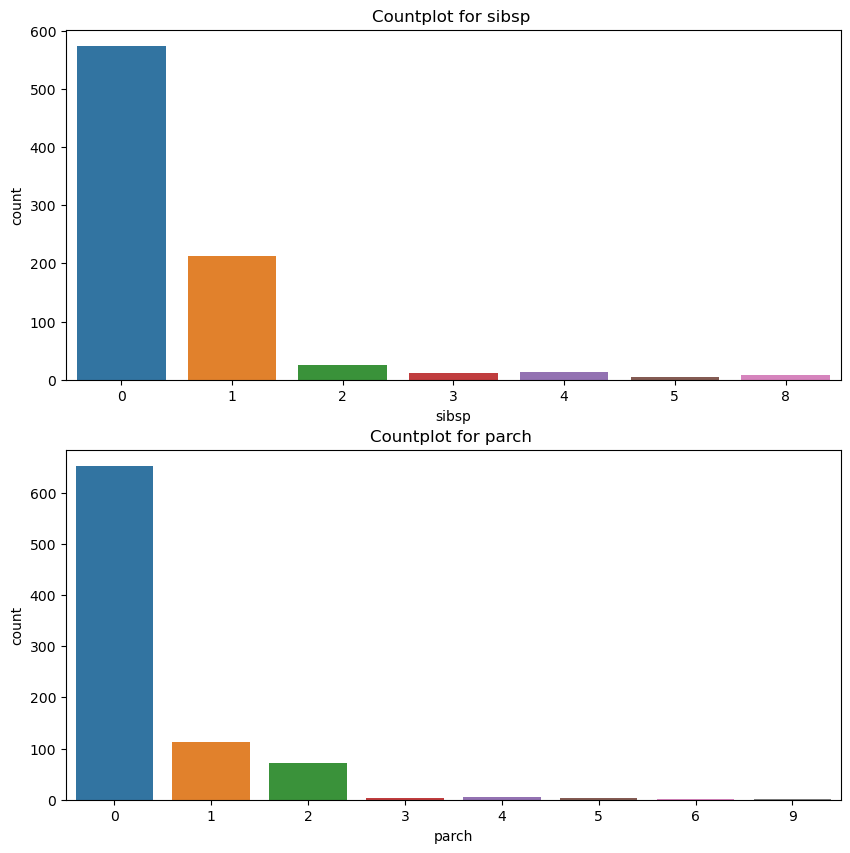

In [198]:
plt.figure(figsize=(10,10))

#subplot allows to have multiple plots at the same time,
#subplot(row,column,panel). We'll use 2 rows and 1 column here.This is panel 1
plt.subplot(2,1,1)
plt.title('Countplot for sibsp ')
sns.countplot(x='sibsp',data=data)

#This is panel 2
plt.subplot(2,1,2)
plt.title('Countplot for parch ')
sns.countplot(x='parch',data=data)

In [199]:

data.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked', 'home.dest', 'survived'],
      dtype='object')

**Bivariate analysis(Comparing two features)**

Text(0, 0.5, 'Fare')

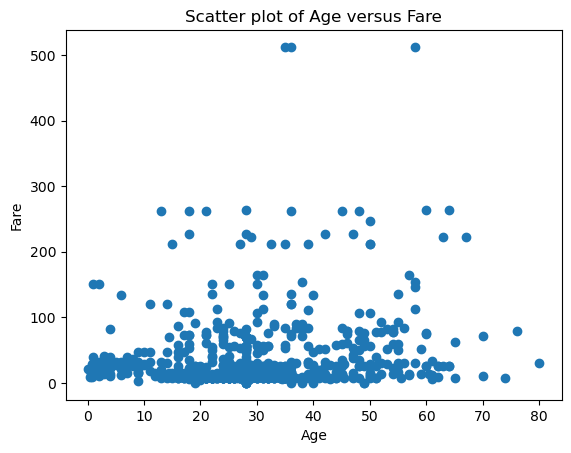

In [200]:
plt.scatter(x='age',y='fare',data=data)
plt.title('Scatter plot of Age versus Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

In [201]:
data[data['sex']=='female']['fare']

0       7.7333
2      24.1500
3      23.0000
7      13.0000
8       7.7750
        ...   
838    13.0000
841    90.0000
842     7.7500
847    26.0000
848    13.7750
Name: fare, Length: 299, dtype: float64

In [202]:
data[["fare"]].min()

fare    0.0
dtype: float64

In [203]:
data.groupby(['sex'])['fare'].mean()

sex
female    47.342770
male      26.743019
Name: fare, dtype: float64

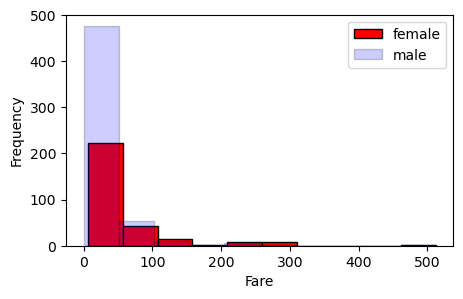

In [204]:
plt.figure(figsize=(5,3))
data[data['sex']=='female']['fare'].plot.hist(bins=10,color='red',edgecolor='black',label='female')
data[data['sex']=='male']['fare'].plot.hist(bins=10,color='blue',alpha=0.2,edgecolor='black',label='male')

plt.xlabel('Fare')
plt.legend()

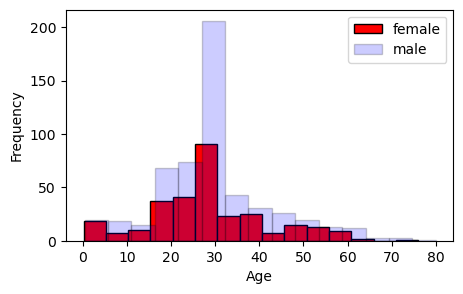

In [205]:
plt.figure(figsize=(5,3))
data[data['sex']=='female']['age'].plot.hist(bins=15,color='red',edgecolor='black',label='female')
data[data['sex']=='male']['age'].plot.hist(bins=15,color='blue',alpha=0.2,edgecolor='black',label='male')

plt.xlabel('Age')
plt.legend()

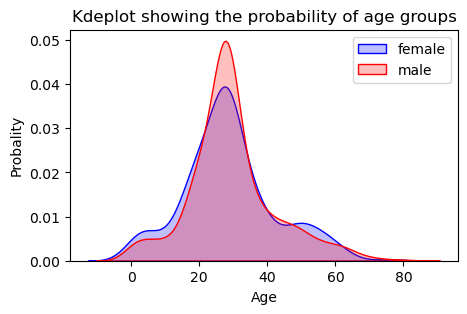

In [206]:
plt.figure(figsize=(5,3))
sns.kdeplot(data.loc[(data['sex']=='female'),'age'],color='b',shade=True, label='female')
sns.kdeplot(data.loc[(data['sex']=='male'),'age'],color='r',shade=True, label='male')

plt.title('Kdeplot showing the probability of age groups')
plt.xlabel('Age')
plt.ylabel('Probality')
plt.legend()

### Feature Selection for Machine Learning

**Encoding(Converting categorical features to numeric features)**

Categorical features like sex,embarked and home dest need to be converted to numbers for the machine to understand. There are ways to do this which include Manual Encoding, One-hot encoding, label encoding

In [207]:
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,28.0,0,0,335432,7.7333,Q,"New York, NY",1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,"New York, NY",0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,"Barre, Co Washington, VT",0


In [208]:
#sex
#Manual encoding

data['sex']=data['sex'].replace('male','0')
data['sex']=data['sex'].replace('female','1')

#Then the type is converted to int
data['sex']=data['sex'].astype('int')

In [209]:
data[["sex"]]

,sex
0,1
1,0
2,1
3,1
4,0
...,...
845,0
846,0
847,1
848,1


In [210]:
data["embarked"].value_counts()

S    590
C    176
Q     84
Name: embarked, dtype: int64

In [211]:
#embarked


data = pd.get_dummies(data=data,columns=['embarked'])

#Let's see how it looks like now, see how embarked is now 3 new fearures
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,home.dest,survived,embarked_C,embarked_Q,embarked_S
0,1216,3,"Smyth, Miss. Julia",1,28.0,0,0,335432,7.7333,"New York, NY",1,0,1,0
1,699,3,"Cacic, Mr. Luka",0,38.0,0,0,315089,8.6625,Croatia,0,0,0,1
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",1,30.0,1,1,345773,24.1500,"New York, NY",0,0,0,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",1,54.0,1,3,29105,23.0000,"Cornwall / Akron, OH",1,0,0,1
4,576,2,"Veal, Mr. James",0,40.0,0,0,28221,13.0000,"Barre, Co Washington, VT",0,0,0,1


In [212]:
data["home.dest"].unique()

array(['New York, NY', 'Croatia', 'Cornwall / Akron, OH',
       'Barre, Co Washington, VT', 'Finland / Washington, DC',
       'Elkins Park, PA', 'Philadelphia, PA', 'Mt Airy, Philadelphia, PA',
       'East Providence, RI', 'Weston-Super-Mare / Moose Jaw, SK',
       'St Leonards-on-Sea, England Ohio', 'Somerset / Bernardsville, NJ',
       'London Skanteales, NY', 'Hornsey, England', 'Plymouth, England',
       'Bristol, England Cleveland, OH', 'Cornwall / Camden, NJ',
       'Haverford, PA / Cooperstown, NY', 'Tuxedo Park, NY',
       'Bridgerule, Devon', 'West Hoboken, NJ',
       'Plymouth, Devon / Detroit, MI', 'Greenwich, CT', 'Ireland',
       'Indianapolis, IN', 'Bryn Mawr, PA',
       'Germantown, Philadelphia, PA', 'London Brooklyn, NY',
       'Co Sligo, Ireland Hartford, CT', 'Devon, England Wichita, KS',
       'Huntington, WV', 'Sittingbourne, England / San Diego, CA',
       'Harrow-on-the-Hill, Middlesex', 'London',
       'Strood, Kent, England Detroit, MI', 'Bulgari

In [213]:
#home dest
#Label encoding

from sklearn.preprocessing import LabelEncoder

#creating an instance like this
le = LabelEncoder()

#Then fitting to the feature to transform
data['home.dest']=le.fit_transform(data['home.dest'])

In [214]:
#home.dest now converted alphabetically into numbers
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,home.dest,survived,embarked_C,embarked_Q,embarked_S
0,1216,3,"Smyth, Miss. Julia",1,28.0,0,0,335432,7.7333,171,1,0,1,0
1,699,3,"Cacic, Mr. Luka",0,38.0,0,0,315089,8.6625,56,0,0,0,1
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",1,30.0,1,1,345773,24.1500,171,0,0,0,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",1,54.0,1,3,29105,23.0000,52,1,0,0,1
4,576,2,"Veal, Mr. James",0,40.0,0,0,28221,13.0000,11,0,0,0,1


In [215]:
#Then let's drop some features that may not be needed for now. 
data=data.drop(['passenger_id','name','ticket'],axis=1)

In [216]:
#checking to see if they really dropped, and all features numerical
data.head()

,pclass,sex,age,sibsp,parch,fare,home.dest,survived,embarked_C,embarked_Q,embarked_S
0,3,1,28.0,0,0,7.7333,171,1,0,1,0
1,3,0,38.0,0,0,8.6625,56,0,0,0,1
2,3,1,30.0,1,1,24.1500,171,0,0,0,1
3,2,1,54.0,1,3,23.0000,52,1,0,0,1
4,2,0,40.0,0,0,13.0000,11,0,0,0,1


Now we need to separate features into input feature/independent variables which is usually denoted by X, and into target/dependent variable usually denoted by y

In [217]:
#for X, we simply drop the target from the features
X = data.drop('survived',axis=1)

#for y
y = data['survived']

Splitting into train and test(for validation). A module in sklearn called train_test_split does this for us. By convention, you split 80% to 20% for train and test respectively

In [218]:
#spliting the X and y into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state = 7, shuffle=True, stratify=y)

In [219]:
0.8 * 850

680.0

In [220]:
X_train.shape, y_test.shape

((680, 10), (170,))

### Model Building

Let's try out some classifiers: Logistic Regression, Decision Tree Classifier, Support Vector Machine, Random Forest, Gradient Boosting

In [221]:
#import classifier
from sklearn.linear_model import LogisticRegression

#Instantiate
lr = LogisticRegression()

#fit to X_train and y_train
lr.fit(X_train,y_train)

#check score of training
print('Score of train:', lr.score(X_train,y_train))

#check score of test set
print('Score of test', lr.score(X_test,y_test))

Score of train: 0.7867647058823529
Score of test 0.8294117647058824


For logistic, test has higher score than train, model is not likely overfitting

In [222]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

tree.fit(X_train,y_train)

print('Score of train:',tree.score(X_train,y_train))
print('Score of test',tree.score(X_test,y_test))

Score of train: 0.9852941176470589
Score of test 0.8235294117647058


Big difference is scores, sign of overfitting

In [223]:
from sklearn.svm import SVC
svc= SVC()

svc.fit(X_train,y_train)

print('Score of train:',svc.score(X_train,y_train))
print('Score of test',svc.score(X_test,y_test))

Score of train: 0.6779411764705883
Score of test 0.6941176470588235


support vector classifier performing below expectation here, showing sign of underfitting, it needs to learn more

In [224]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

print('Score of train:',rf.score(X_train,y_train))
print('Score of test',rf.score(X_test,y_test))

Score of train: 0.9852941176470589
Score of test 0.8647058823529412


Good train score, but less test score. Overfitting too

In [225]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()

gb.fit(X_train,y_train)

print('Score of train:',gb.score(X_train,y_train))
print('Score of test',gb.score(X_test,y_test))

Score of train: 0.8897058823529411
Score of test 0.8705882352941177


Gradient Boosting is not overfitting, and has the higher score out of the classifiers here

In [226]:
X_train[0:1]

,pclass,sex,age,sibsp,parch,fare,home.dest,embarked_C,embarked_Q,embarked_S
759,1,0,0.9167,1,2,151.55,165,0,0,1


In [227]:
predi = gb.predict(X_train[:1])
predi

array([1], dtype=int64)

### Other techniques for improvement

**Feature Engineering**
This refers to creation of new addition features. For instance, sibsp(siblings and spouses) and parch(parents and children) can be summed up into a new feature called family_size which is addition of both features. Also age feature can be categorized into: children,adolescent,young adult,old adult. Feature engineering didn't improve our gb model in this case, so i'ev commented the code below. Remove the ''' to run the codes

In [228]:
'''
#family_size
X_train['family_size'] = X_train['sibsp'] + X_train['parch']
X_test['family_size'] = X_test['sibsp'] + X_test['parch']

#We drop sibsp and parch as we have family size now
X_train = X_train.drop(['sibsp','parch'],axis=1)
X_test = X_test.drop(['sibsp','parch'],axis=1)

#age categorization. We can use pd.cut here because age is continuous
X_train['age_category'] = pd.cut(X_train['age'],bins=[0,18,40,80],labels=['Children','Youth','Adult'])
X_test['age_category'] = pd.cut(X_test['age'],bins=[0,18,40,80],labels=['Children','Youth','Adult'])
'''

"\n#family_size\nX_train['family_size'] = X_train['sibsp'] + X_train['parch']\nX_test['family_size'] = X_test['sibsp'] + X_test['parch']\n\n#We drop sibsp and parch as we have family size now\nX_train = X_train.drop(['sibsp','parch'],axis=1)\nX_test = X_test.drop(['sibsp','parch'],axis=1)\n\n#age categorization. We can use pd.cut here because age is continuous\nX_train['age_category'] = pd.cut(X_train['age'],bins=[0,18,40,80],labels=['Children','Youth','Adult'])\nX_test['age_category'] = pd.cut(X_test['age'],bins=[0,18,40,80],labels=['Children','Youth','Adult'])\n"

In [229]:
'''
#Then one-hot encoding age_category
X_train = pd.get_dummies(data = X_train,columns=['age_category'])
X_test = pd.get_dummies(data = X_test,columns=['age_category'])
'''

"\n#Then one-hot encoding age_category\nX_train = pd.get_dummies(data = X_train,columns=['age_category'])\nX_test = pd.get_dummies(data = X_test,columns=['age_category'])\n"

In [230]:

gbc= GradientBoostingClassifier()

gbc.fit(X_train,y_train)

print('Score of train:',gbc.score(X_train,y_train))
print('Score of test',gbc.score(X_test,y_test))


Score of train: 0.8897058823529411
Score of test 0.8705882352941177


**Modelling with scaling**

Scaling is a preprocessing stage in machine learning, that is, you need to process your data before feeding it into your machine. Scaling techniques include standardization, normalization. You may also use log transform

In [231]:
X_train[['age','fare','home.dest']]

,age,fare,home.dest
759,0.9167,151.5500,165
518,63.0000,26.0000,241
382,28.0000,7.5500,171
362,28.0000,7.7500,171
38,28.0000,7.5500,171
...,...,...,...
484,24.0000,10.5000,171
227,47.0000,52.5542,171
571,22.0000,7.7958,171
40,38.5000,7.2500,171


In [232]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import Normalizer

#We'll use only StandardScaler for demonstration, so we instantiate this
std = StandardScaler()

#Then fit and transform on features with large values
#First fitting on X_train
std.fit(X_train[['age','fare','home.dest']])

StandardScaler()

In [233]:
#Then transforming on both X_train and X_test
X_train[['age','fare','home.dest']] = std.transform(X_train[['age','fare','home.dest']])
X_test[['age','fare','home.dest']] = std.transform(X_test[['age','fare','home.dest']])

In [234]:
X_train[['age','fare','home.dest']]

,age,fare,home.dest
759,-2.166024,2.151859,0.165969
518,2.562939,-0.142860,1.485961
382,-0.103055,-0.480077,0.270179
362,-0.103055,-0.476421,0.270179
38,-0.103055,-0.480077,0.270179
...,...,...,...
484,-0.407740,-0.426159,0.270179
227,1.344199,0.342480,0.270179
571,-0.560083,-0.475584,0.270179
40,0.696743,-0.485560,0.270179


So let's see if this will improve accuracy for logistic regression and SVC

In [235]:
#Instantiate a second LogisticRegression
lr2 = LogisticRegression()

#fit to X_train and y_train
lr2.fit(X_train,y_train)

#check score of training
print('Score of train:',lr2.score(X_train,y_train))

#check score of test set
print('Score of test',lr2.score(X_test,y_test))

Score of train: 0.7852941176470588
Score of test 0.8176470588235294


Scores didnt improve for Logistic Regression

In [236]:
svc2= SVC()

svc2.fit(X_train,y_train)

print('Score of train:',svc2.score(X_train,y_train))
print('Score of test',svc2.score(X_test,y_test))

Score of train: 0.8073529411764706
Score of test 0.8705882352941177


Wow see the huge improvement for Support Vector Classifier

Now try for other classifiers

In [237]:

gbc= GradientBoostingClassifier()

gbc.fit(X_train,y_train)

print('Score of train:',gbc.score(X_train,y_train))
print('Score of test',gbc.score(X_test,y_test))


Score of train: 0.8897058823529411
Score of test 0.8705882352941177


**Modelling with feature importance**

We can rank feature in terms of importance to our label 'survived', that is, how much if feature contributed to survival. With feature importance, we may drop features with low importance and see if accuracy increases. We can use SelectKbest or check the feature importnace for each algorithm

In [238]:
#Kbest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [239]:
fit.scores_

array([2.79124652e+01, 1.43469161e+02, 5.55764866e+00, 4.06718967e+00,
       6.01387014e+00, 4.55152010e+03, 9.23574396e+01, 1.67531727e+01,
       1.90962634e-01, 4.28752521e+00])

In [240]:
X.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'home.dest',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [241]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

        Specs        Score
5        fare  4551.520098
1         sex   143.469161
6   home.dest    92.357440
0      pclass    27.912465
7  embarked_C    16.753173
4       parch     6.013870
2         age     5.557649
9  embarked_S     4.287525
3       sibsp     4.067190
8  embarked_Q     0.190963


fare and sex most important here

In [242]:
#Feature importance of algorithm, for instance gradient boosting


In [243]:
#This is an array, will need to convert to dataframe to add column names
gb.feature_importances_

array([0.12016967, 0.38574732, 0.15735876, 0.0685288 , 0.00650072,
       0.15247317, 0.08865437, 0.01218622, 0.00375117, 0.00462981])

In [244]:
gb_feature_importances = pd.DataFrame(gb.feature_importances_, index=X.columns.tolist())

In [245]:
gb_feature_importances

,0
pclass,0.120170
sex,0.385747
age,0.157359
sibsp,0.068529
parch,0.006501
fare,0.152473
home.dest,0.088654
embarked_C,0.012186
embarked_Q,0.003751
embarked_S,0.004630


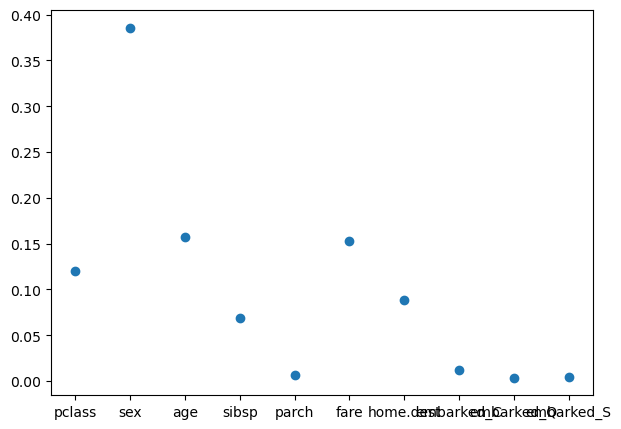

In [246]:
#Feature importance of gradient boosting

plt.figure(figsize=(7, 5))
plt.plot(gb_feature_importances,'o')

sex,pclass,age and fare are most important for gradient boosting

Will remove the least important features: parch, embarked_C,embarked_Q and embarked_S to see if accuracy improves

In [247]:
#dropping those columns
new_X_train = X_train.drop(['parch', 'embarked_C','embarked_Q','embarked_S'],axis=1)
new_X_test = X_test.drop(['parch', 'embarked_C','embarked_Q','embarked_S'],axis=1)

gb2 = GradientBoostingClassifier()

gb.fit(X_train,y_train)
gb2.fit(new_X_train,y_train)

#initial scores
print('Score of train:',gb.score(X_train,y_train))
print('Score of test',gb.score(X_test,y_test))

#new scores
print('Score of new train:',gb2.score(new_X_train,y_train))
print('Score of new test',gb2.score(new_X_test,y_test))

Score of train: 0.8897058823529411
Score of test 0.8705882352941177
Score of new train: 0.9014705882352941
Score of new test 0.8705882352941177


Even after dropping 4 columns, the algotithm is still performing well, Score improved for train but didnt for test. You can try out other algorithms

In [248]:
# Put models in a dictionary
from sklearn.neighbors import KNeighborsClassifier

models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "SVC": SVC(),
          "Tree": DecisionTreeClassifier(),
           "GB": GradientBoostingClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(40)
    # Make a list to keep model scores
    model_scores = {} #Key:Value
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(new_X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(new_X_test, y_test)
    return model_scores

In [249]:
model_scores = fit_and_score(models=models,
                             X_train=new_X_train,
                             X_test=new_X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.8588235294117647,
 'Logistic Regression': 0.8176470588235294,
 'Random Forest': 0.8823529411764706,
 'SVC': 0.8705882352941177,
 'Tree': 0.7705882352941177,
 'GB': 0.8705882352941177}

This performed better than the ensemble, creating an ensemble of this algorithm with others can give better score, try it

**Cross Validation and Hyper Parameter tuning**

__Cross Validation__

Many a times, the data is imbalanced, i.e there may be a high number of a class instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset. 

1)The K-Fold Cross Validation works by shuffling the dataset randomly

2)It then splits the dataset into K groups i.e (k = 10)

3)And for each unique group it splits the dataset into: It takes the group as a hold-out or test dataset and takes the remaining groups as training dataset. It then fits the model on the training set and evaluates it on the test set.

4)It Retains the evaluation score and discards the model

5)It then averages the score of the model using the sample of model evaluation scores

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.


In [250]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts

#empty list of average of cross validation(cv) scores
cvmean =[]

#empty list of accuracy 
accuracy=[]

#empty list of standard deviation of score
std=[]

#algorithms to use for cv
classifiers=['Random Forest','Logistic Regression','Support Vector Classifier','GradientBoostingClassifier', 'KNN', 'DecisionTree']

#their models
models=[RandomForestClassifier(),LogisticRegression(),SVC(),GradientBoostingClassifier(),KNeighborsClassifier(),DecisionTreeClassifier()]

#iterating through all the models
for model in models:
    
    #get cross validation score for each moodel after splitting by kfold
    cv_result = cross_val_score(model, X, y, cv = kfold, scoring = "accuracy")
    
    #append results for mean,std,accuracy to the empty lists
    cvmean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
    #turning the results into a dataframe   
cv_dataframe=pd.DataFrame({'CV Mean':cvmean,'Std':std},index=classifiers) 

cv_dataframe

,CV Mean,Std
Random Forest,0.817647,0.036923
Logistic Regression,0.785882,0.054373
Support Vector Classifier,0.667059,0.059769
GradientBoostingClassifier,0.815294,0.036089
KNN,0.683529,0.067470
DecisionTree,0.783529,0.033771


In [251]:
cvmean

[0.8176470588235294,
 0.7858823529411765,
 0.6670588235294116,
 0.8152941176470587,
 0.6835294117647058,
 0.7835294117647058]

In [252]:
(0.84705882 + 0.84705882+ 0.87058824+0.77647059+0.83529412+0.75294118+0.8+0.77647059+0.82352941+0.84705882)/10

0.8176470589999999

In [253]:
accuracy

[array([0.84705882, 0.84705882, 0.87058824, 0.77647059, 0.83529412,
        0.75294118, 0.8       , 0.77647059, 0.82352941, 0.84705882]),
 array([0.8       , 0.83529412, 0.8       , 0.76470588, 0.8       ,
        0.71764706, 0.83529412, 0.68235294, 0.75294118, 0.87058824]),
 array([0.65882353, 0.74117647, 0.71764706, 0.72941176, 0.72941176,
        0.57647059, 0.69411765, 0.62352941, 0.6       , 0.6       ]),
 array([0.82352941, 0.83529412, 0.85882353, 0.76470588, 0.83529412,
        0.77647059, 0.85882353, 0.81176471, 0.75294118, 0.83529412]),
 array([0.72941176, 0.77647059, 0.74117647, 0.72941176, 0.69411765,
        0.54117647, 0.69411765, 0.61176471, 0.62352941, 0.69411765]),
 array([0.78823529, 0.76470588, 0.87058824, 0.75294118, 0.8       ,
        0.74117647, 0.78823529, 0.78823529, 0.76470588, 0.77647059])]

We see GradientBoostingClassifier having score of 0.816 with cv as against 0.870 without cv. Score for Cross Validation is more reliable, and this cv score will be closer to the submitted score on kaggle.
We could tune hyperparameters for the GradientBoostingClassifier and RandomForestClassifier


__Hyper parameter optimization/ Tuning__ 

Hyper parameter optimization/ Tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. Though Tedious, Hyperparameter tuning remains a very crucial and important step for achieving the best model in any Machine Learning Task. Hyperparameter tuning can be done using the GridSearch method or RandomizedGridSearch method

In [254]:
gb.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [255]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

GradientBoostingClassifier(learning_rate=0.1, n_estimators=200)

In [256]:
from sklearn.model_selection import RandomizedSearchCV

# Different gradientboostClasssifier hyperparameters
gb_grid = {'learning_rate':[0.1, 0.2],
    'n_estimators':[90,100,120,150]
     }

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [257]:
#RandomizedSearch for GradientBoostingClassifier

# Setup random seed
np.random.seed(40)

# Setup random hyperparameter search for LogisticRegression
rs_gb = RandomizedSearchCV(GradientBoostingClassifier(),
                                param_distributions=gb_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_gb.fit(new_X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   param_distributions={'learning_rate': [0.1, 0.2],
                                        'n_estimators': [90, 100, 120, 150]},
                   verbose=True)

In [258]:
rs_gb.score(new_X_test, y_test)

0.8705882352941177

In [259]:
rs_gb.best_params_

{'n_estimators': 100, 'learning_rate': 0.1}

In [260]:
#RandomizedSearch for RandomForestClassifier

# Setup random seed
np.random.seed(40)

# Setup random hyperparameter search for LogisticRegression
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(new_X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [261]:
rs_rf.score(new_X_test, y_test)

0.8529411764705882

In [262]:
rs_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': None}

We further tune GradientBoosting exhaustively over various other parameters using GridSearchCV

In [263]:
#GridSearchCV for GradientBoostingClassifier

In [264]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
para={'learning_rate':[0.1],
    'n_estimators':[100],
      'max_features':['auto', 'sqrt', 'log2'],
     }
#scoring={'roc_auc_score': make_scorer(roc_auc_score)}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid= GridSearchCV(GradientBoostingClassifier(),param_grid=para,scoring='accuracy',cv=kfold,n_jobs=-1)

In [265]:
grid.fit(new_X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]},
             scoring='accuracy')

In [266]:
grid.score(new_X_test, y_test)

0.8705882352941177

In [267]:
grid.best_params_

{'learning_rate': 0.1, 'max_features': 'auto', 'n_estimators': 100}

In [268]:
grid_pre = grid.predict(new_X_test)
grid_pre

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [269]:
np.array(y_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [270]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(accuracy_score(y_test,grid_pre))

0.8705882352941177


That concludes out parameter tunning

In [271]:
'''
import joblib

with open('model.joblib', 'wb') as f:
    joblib.dump(gb, f)
'''

"\nimport joblib\n\nwith open('model.joblib', 'wb') as f:\n    joblib.dump(gb, f)\n"

### EVALUATION METRICS

Other Evaluation:

1. ROC/AUC

2. Classification Report

3. Confusion metrics

4. Cross_val_score

In [272]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve


**ROC curve and AUC scores.**

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

To get an appropriate example in a real-world problem, consider a prediction whether a person survived or not, a False Positive
in this case is that the person survived when actually the person died.



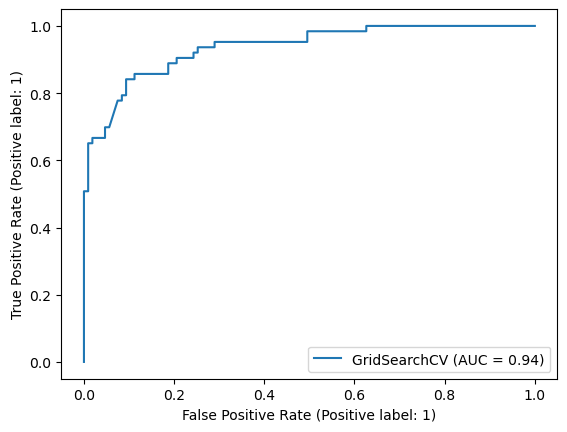

In [273]:
plot_roc_curve(grid, new_X_test, y_test)

Great!

Our model predits with 6% confusion that a person survived when actually the erson died.
Is this negligible since it predicts with 94% accuracy?

Is there still room for improvement?

**Confusion Matrix**

In [274]:
#The confusion matrix will need predictions from our model

y_preds = grid.predict(new_X_test)
y_preds

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [275]:
np.array(y_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [276]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[98  9]
 [13 50]]


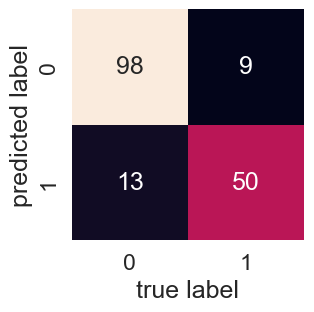

In [277]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

There are 9 occasions where our model predicted the death of a passenger when they actually survived

And 13 occasion where our model predicted the survival of a passenger when they actually died.

Positive and negative in this case are generic names for the predicted classes. There are four ways to check if the predictions are right or wrong:

**TN / True Negative**: when a case was negative and predicted negative 

**TP / True Positive**: when a case was positive and predicted positive 

**FN / False Negative**: when a case was positive but predicted negative 

**FP / False Positive**: when a case was negative but predicted positive


**Precision**
– What percent of your predictions were correct? Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

TP – True Positives FP – False Positives

Precision – Accuracy of positive predictions. Precision = TP/(TP + FP)



**Recall** – What percent of the positive cases did you catch? Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

FN – False Negatives

Recall: Fraction of positives that were correctly identified. Recall = TP/(TP+FN)



**F1 score** – What percent of positive predictions were correct? The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)



**support**
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

**Classification Report**

In [278]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       107
           1       0.85      0.79      0.82        63

    accuracy                           0.87       170
   macro avg       0.87      0.85      0.86       170
weighted avg       0.87      0.87      0.87       170



The report shows the main classification metrics precision, recall and f1-score on a per-class basis.
The metrics are calculated by using true and false positives, true and false negatives. 


Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct.

Recall - Indicates the proportion of actual positives which were correctly classified.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.